# Import Library

In [6]:
#for data manupulating
import numpy as np
import pandas as pd

#for preprocessin sate
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#for classification model
from sklearn.naive_bayes import GaussianNB

#for checking accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     
import scikitplot as skplt

In [7]:
diabetes = pd.read_csv('diabetic.csv', skiprows=1,header = None)  
diabetes

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,8222157,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,No
1,55629189,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,No,No,No,No,Up,Yes
2,86047875,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,No,Yes
3,82442376,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,No,No,No,No,Up,Yes
4,42519267,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,No,No,No,No,Steady,Yes
5,82637451,Male,[50-60),2,1,2,3,31,6,16,...,No,No,No,No,No,No,No,No,Steady,Yes
6,84259809,Male,[60-70),3,1,2,4,70,1,21,...,No,No,No,No,No,No,No,No,Steady,Yes
7,114882984,Male,[70-80),1,1,7,5,73,0,12,...,No,No,No,No,No,No,No,No,No,Yes
8,48330783,Female,[80-90),2,1,4,13,68,2,28,...,No,No,No,No,No,No,No,No,Steady,Yes
9,63555939,Female,[90-100),3,3,4,12,33,3,18,...,No,Steady,No,No,No,No,No,No,Steady,Yes


# Feature Selection

In [3]:
#for features selection and preprocessing
#we neglect 13 , 14 , 15 columns
x1 = pd.read_csv('diabetic.csv',header=None,skiprows=1,usecols=range(0,13)).dropna()
x2 = pd.read_csv('diabetic.csv',header=None,skiprows=1,usecols=range(16,38)).dropna()
Data1 = x1.join(x2)

#transform Dataframe to array
Data = np.array(Data1)
print(Data.shape)

(101766, 35)


In [4]:
Data

array([[8222157, 'Female', '[0-10)', ..., 'No', 'No', 'No'],
       [55629189, 'Female', '[10-20)', ..., 'No', 'Up', 'Yes'],
       [86047875, 'Female', '[20-30)', ..., 'No', 'No', 'Yes'],
       ..., 
       [41088789, 'Male', '[70-80)', ..., 'No', 'Down', 'Yes'],
       [31693671, 'Female', '[80-90)', ..., 'No', 'Up', 'Yes'],
       [175429310, 'Male', '[70-80)', ..., 'No', 'No', 'No']], dtype=object)

# Label Encoder

In [5]:
#To encode Label1
Data[:,range(14,35)]
Data.shape

(101766, 35)

In [14]:
#for Interger Encoding to Categorical data
le = LabelEncoder()

for i in range (14,35):
    le.fit(Data[:,i])
    Data[:,i] = le.transform(Data[:,i])

Data[:,range(14,35)]

array([[2, 2, 1, ..., 0, 1, 0],
       [2, 2, 1, ..., 0, 3, 1],
       [2, 2, 1, ..., 0, 1, 1],
       ..., 
       [2, 2, 2, ..., 0, 0, 1],
       [2, 2, 1, ..., 0, 3, 1],
       [2, 2, 1, ..., 0, 1, 0]], dtype=object)

In [8]:
#To encode Label2
Data[:,range(1,3)]

array([['Female', '[0-10)'],
       ['Female', '[10-20)'],
       ['Female', '[20-30)'],
       ..., 
       ['Male', '[70-80)'],
       ['Female', '[80-90)'],
       ['Male', '[70-80)']], dtype=object)

In [9]:
for i in range (1,3):
    le = LabelEncoder()
    le.fit(Data[:,i])
    Data[:,i] = le.transform(Data[:,i])
    
Data[:,range(1,3)]

array([[0, 0],
       [0, 1],
       [0, 2],
       ..., 
       [1, 7],
       [0, 8],
       [1, 7]], dtype=object)

In [10]:
#Data.shape                           #Total Data
Data

array([[8222157, 0, 0, ..., 0, 1, 0],
       [55629189, 0, 1, ..., 0, 3, 1],
       [86047875, 0, 2, ..., 0, 1, 1],
       ..., 
       [41088789, 1, 7, ..., 0, 0, 1],
       [31693671, 0, 8, ..., 0, 3, 1],
       [175429310, 1, 7, ..., 0, 1, 0]], dtype=object)

# Input / Output Declaration

In [18]:
X = Data[:,range(1,34)]
X.shape

(101766, 33)

In [23]:
Y = Data[:,range(34,35)]

#Change Y Data Type
y = Y.ravel()
Y = np.array(y).astype(int)

Y.shape

(101766,)

# Shuffle Data

In [24]:
X,Y = shuffle(X,Y,random_state=1) 

# Train / Test Split

In [25]:
#spliting samples into train data and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(71236, 33)
(71236,)
(30530, 33)
(30530,)


# Naive Baye Models

In [27]:
from sklearn.naive_bayes import GaussianNB      #Import model 

gnb = GaussianNB()                                    #delcare gnb as model 
gnb.fit(x_train,y_train)
#gnb.fit(x_train, y_train.astype(int))                             #model.Train dat

GaussianNB(priors=None)

# Predicting train and test samples

In [28]:
#predicting train and test samples
y_train_predict = gnb.predict(x_train)
y_test_predict = gnb.predict(x_test)

In [33]:
#testing the accuracy score of train and test data
train_accuracy = accuracy_score(y_train,y_train_predict)
test_accuracy = accuracy_score(y_test,y_test_predict)
print((train_accuracy)*100)
print((test_accuracy)*100)

24.23072603739682
23.7111038322961


In [34]:
#testing the confusion matrix of train and test data

print(confusion_matrix(y_train,y_train_predict))
print('_______________________________\n')
print(confusion_matrix(y_test,y_test_predict))

[[16218   262]
 [53713  1043]]
_______________________________

[[ 6805   118]
 [23173   434]]


# 3D Confusion Metrix

C:\Users\td\AppData\Local\conda\conda\envs\thone\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


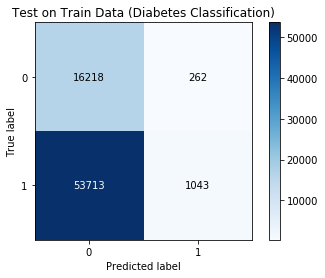

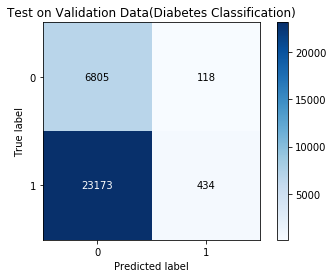

In [35]:
#(4) Accuracy measure & Plot  (Confusion Matrix)

skplt.metrics.plot_confusion_matrix(y_train, y_train_predict,
                                    title = "Test on Train Data (Diabetes Classification)",  
                                    normalize=False)                         #pip install scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, y_test_predict,
                                    title ="Test on Validation Data(Diabetes Classification)", 
                                    normalize=False)                         #pip install scikit-plot